In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  
df=pd.read_csv('data.csv')
df.dropna(inplace=True)

In [4]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [ ]:
df[['lat','loc_x','loc_y','lon','shot_distance','shot_type','shot_zone_area', 'shot_zone_basic','shot_zone_range']].head()

In [14]:
df[['shot_zone_range']].head()

,shot_zone_range
1,8-16 ft.
2,16-24 ft.
3,16-24 ft.
4,Less Than 8 ft.
5,8-16 ft.


In [ ]:
average_percentage=df.shot_made_flag.mean()

In [13]:
df['year'] = pd.DatetimeIndex(df['game_date']).year
df['month'] = pd.DatetimeIndex(df['game_date']).month
df['day'] = pd.DatetimeIndex(df['game_date']).day
df['home']=df['matchup'].apply(lambda x: 1 if 'vs' in x else 0)

In [7]:
percent=df.groupby(['season','period'],as_index=False).shot_made_flag.mean()
percent.tail()

,season,period,shot_made_flag
104,2014-15,5,0.250000
105,2015-16,1,0.346405
106,2015-16,2,0.371681
107,2015-16,3,0.379167
108,2015-16,4,0.318750


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

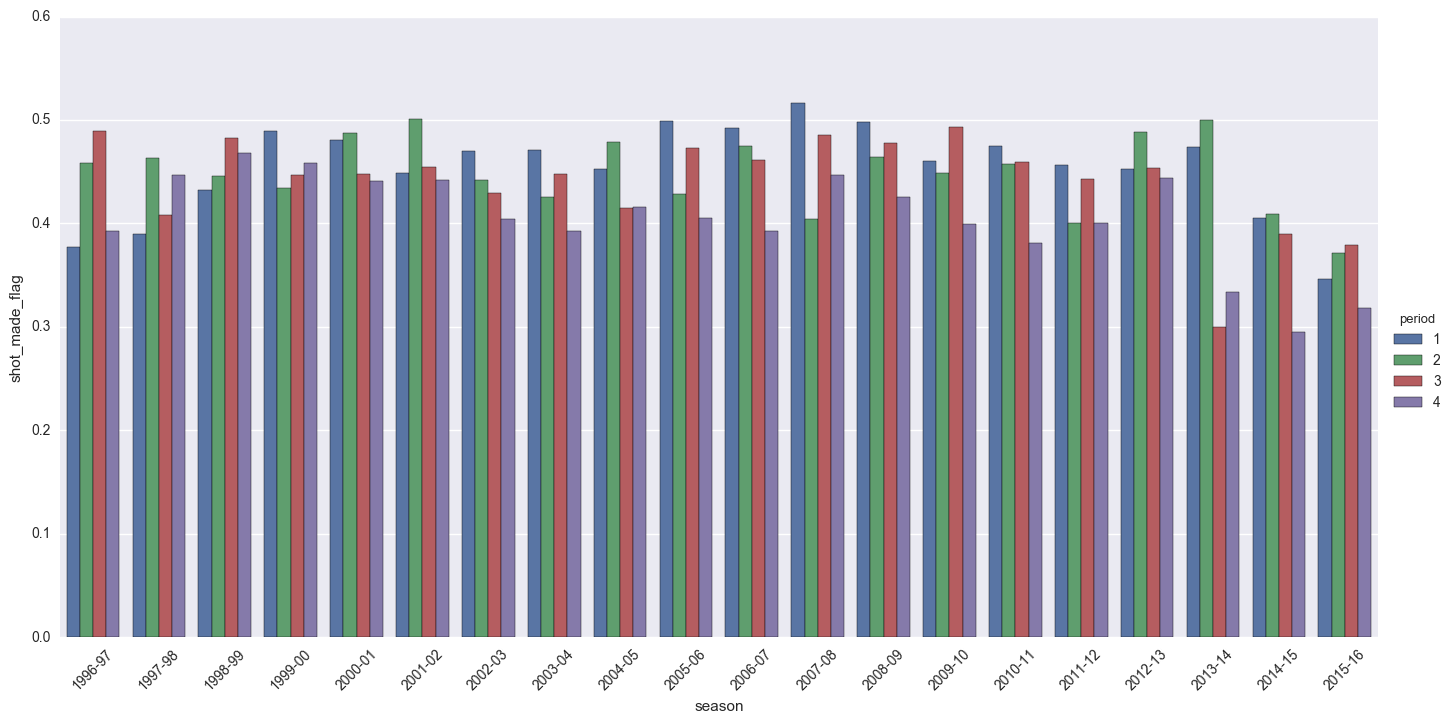

In [8]:
import seaborn as sns
#g=sns.factorplot(x="season", col="period",data=percent);
percent_reg=percent[percent.period<5]
g=sns.factorplot(x="season",y="shot_made_flag",hue="period",kind="bar",data=percent_reg,size=7,aspect=2)
plt.xticks(rotation=45)

In [5]:
percent2=df.groupby(['season','period','combined_shot_type','shot_type'],as_index=False).shot_made_flag.mean()
percent2.tail()

,season,period,combined_shot_type,shot_type,shot_made_flag
534,2015-16,3,Jump Shot,3PT Field Goal,0.303922
535,2015-16,3,Layup,2PT Field Goal,0.607143
536,2015-16,4,Jump Shot,2PT Field Goal,0.328571
537,2015-16,4,Jump Shot,3PT Field Goal,0.294872
538,2015-16,4,Layup,2PT Field Goal,0.416667


(0.25, 0.6)

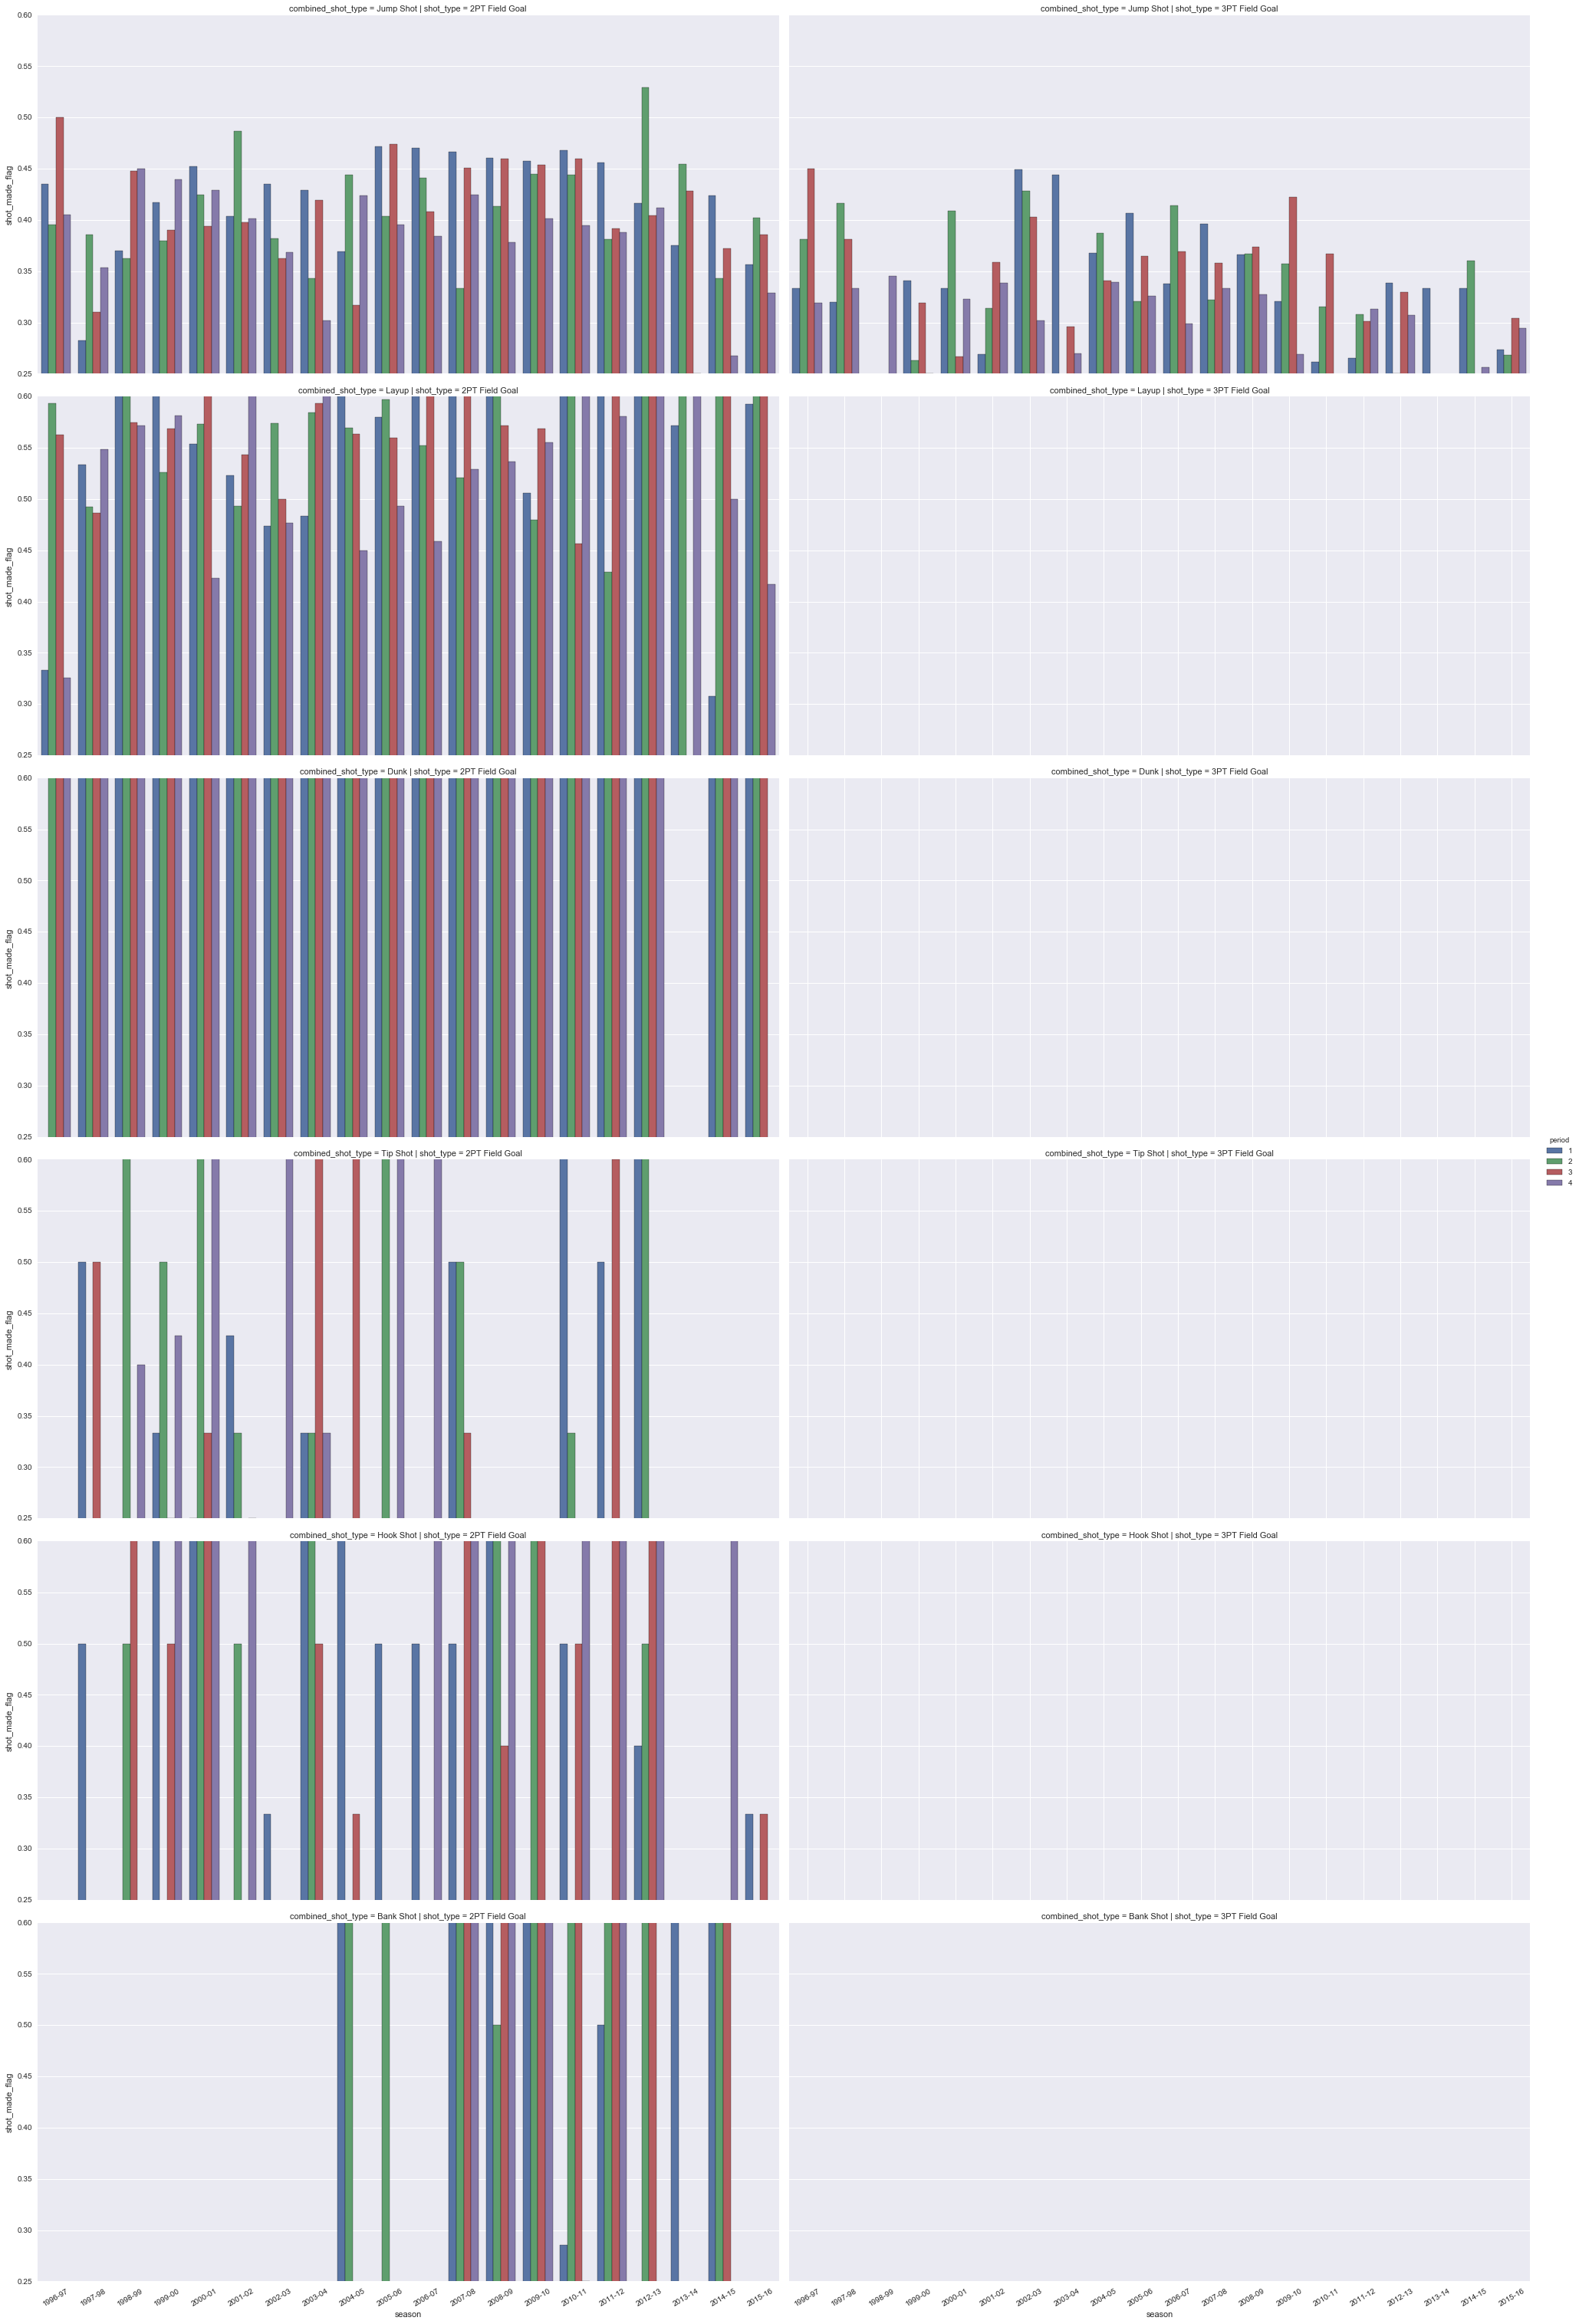

In [8]:
percent_reg2=percent2[percent2.period<5]
g=sns.factorplot(x="season",y="shot_made_flag",hue="period",kind="bar",row="combined_shot_type",col='shot_type',data=percent_reg2,size=7,aspect=2)
g.set_xticklabels(rotation=30)
plt.ylim([0.25,0.6])

In [16]:
percent3=df.groupby(['season','period','shot_type'],as_index=False).shot_made_flag.mean()
percent_reg3=percent3[percent3.period<5]
percent3.head()

,season,period,shot_type,shot_made_flag
0,1996-97,1,2PT Field Goal,0.390244
1,1996-97,1,3PT Field Goal,0.333333
2,1996-97,2,2PT Field Goal,0.494382
3,1996-97,2,3PT Field Goal,0.380952
4,1996-97,3,2PT Field Goal,0.517241


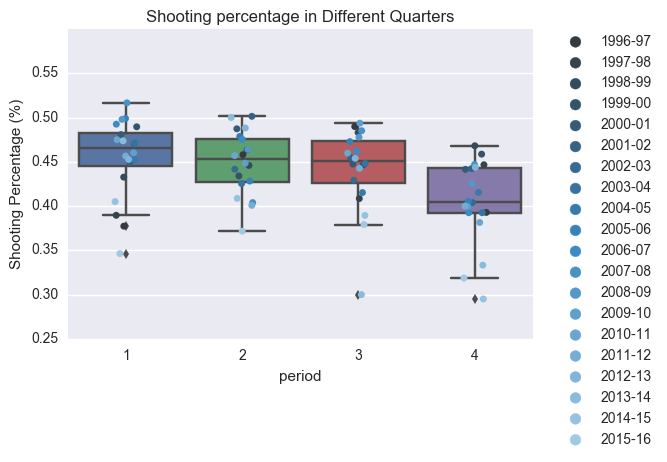

In [11]:
#sns.set(style="whitegrid", palette="muted")
g=sns.stripplot(x="period", y="shot_made_flag", hue="season",data=percent_reg,jitter=True, palette="Blues_d")
g = sns.boxplot(x="period", y="shot_made_flag", data=percent_reg)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.25,0.6])
plt.ylabel('Shooting Percentage (%)')
plt.title('Shooting percentage in Different Quarters')

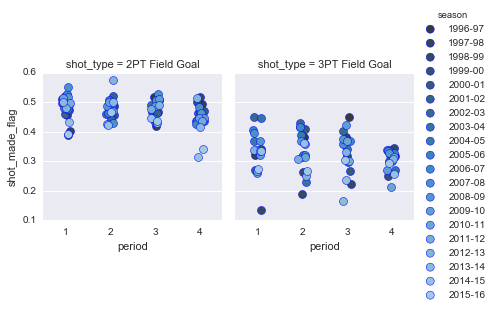

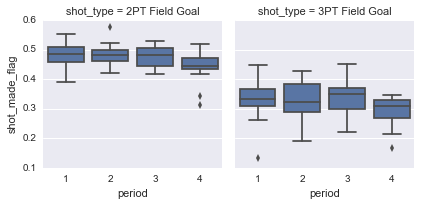

In [18]:
kws = dict(s=8, linewidth=.5, edgecolor="b")
g = sns.FacetGrid(percent_reg3, col="shot_type", sharex=False,ylim=([0.10,0.6]),hue="season",palette="Blues_d",
                  gridspec_kws={"width_ratios": [5, 5]})
g=(g.map(sns.stripplot, "period", "shot_made_flag",jitter=True,**kws)).add_legend()


g = sns.FacetGrid(percent_reg3, col="shot_type", sharex=False,ylim=([0.10,0.6]),
                  gridspec_kws={"width_ratios": [5, 5]})
g=g.map(sns.boxplot, "period", "shot_made_flag")

In [58]:
percent4=df.groupby(['season','period','playoffs'],as_index=False).shot_made_flag.mean()
percent_reg4=percent4[percent4.period<5]
percent4.head()

,season,period,playoffs,shot_made_flag
0,1996-97,1,0,0.380000
1,1996-97,1,1,0.333333
2,1996-97,2,0,0.471074
3,1996-97,2,1,0.300000
4,1996-97,3,0,0.489362


# PLAYOFF

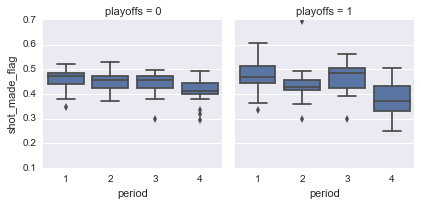

In [28]:
g = sns.FacetGrid(percent_reg4, col="playoffs", sharex=False,ylim=([0.1,0.7]),
                  gridspec_kws={"width_ratios": [5, 5]})
g=g.map(sns.boxplot, "period", "shot_made_flag")

# Type of Shot

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

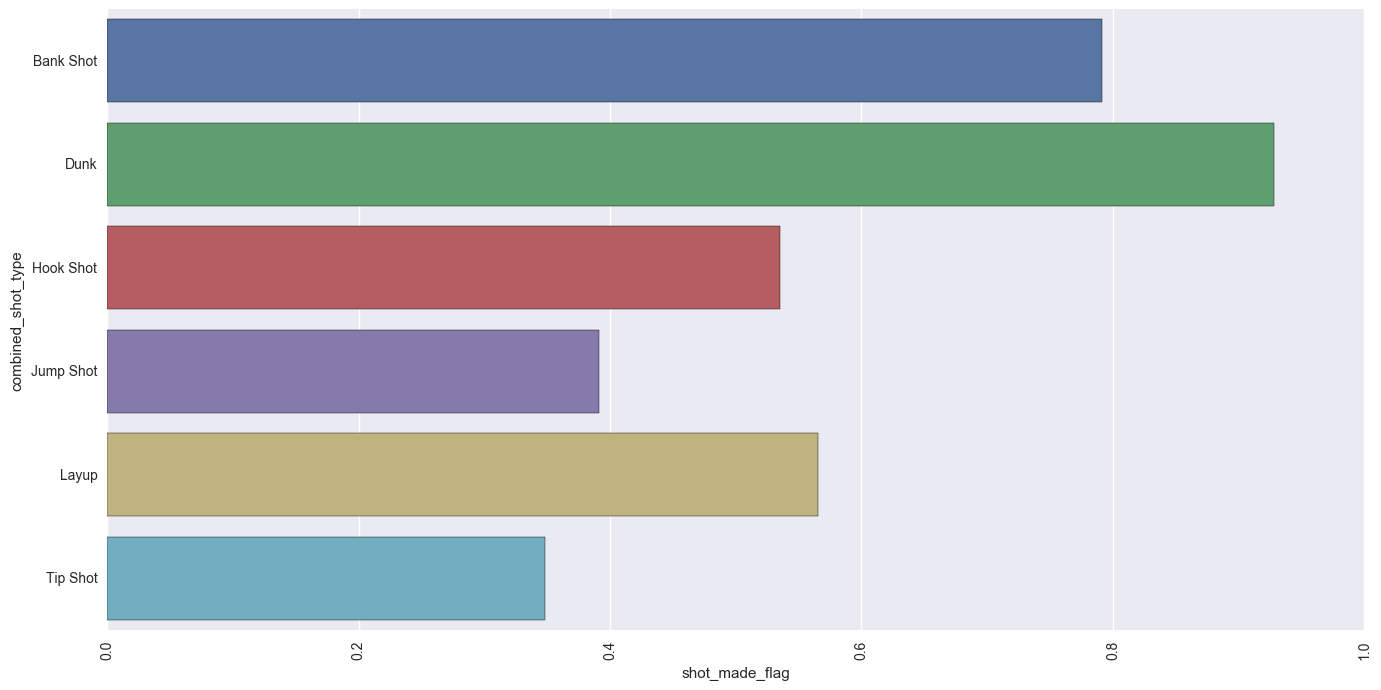

In [7]:
percent5=df.groupby(['combined_shot_type'],as_index=False).shot_made_flag.mean()
g=sns.factorplot(y="combined_shot_type",x="shot_made_flag",kind="bar",data=percent5,size=7,aspect=2)
plt.xticks(rotation=90)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

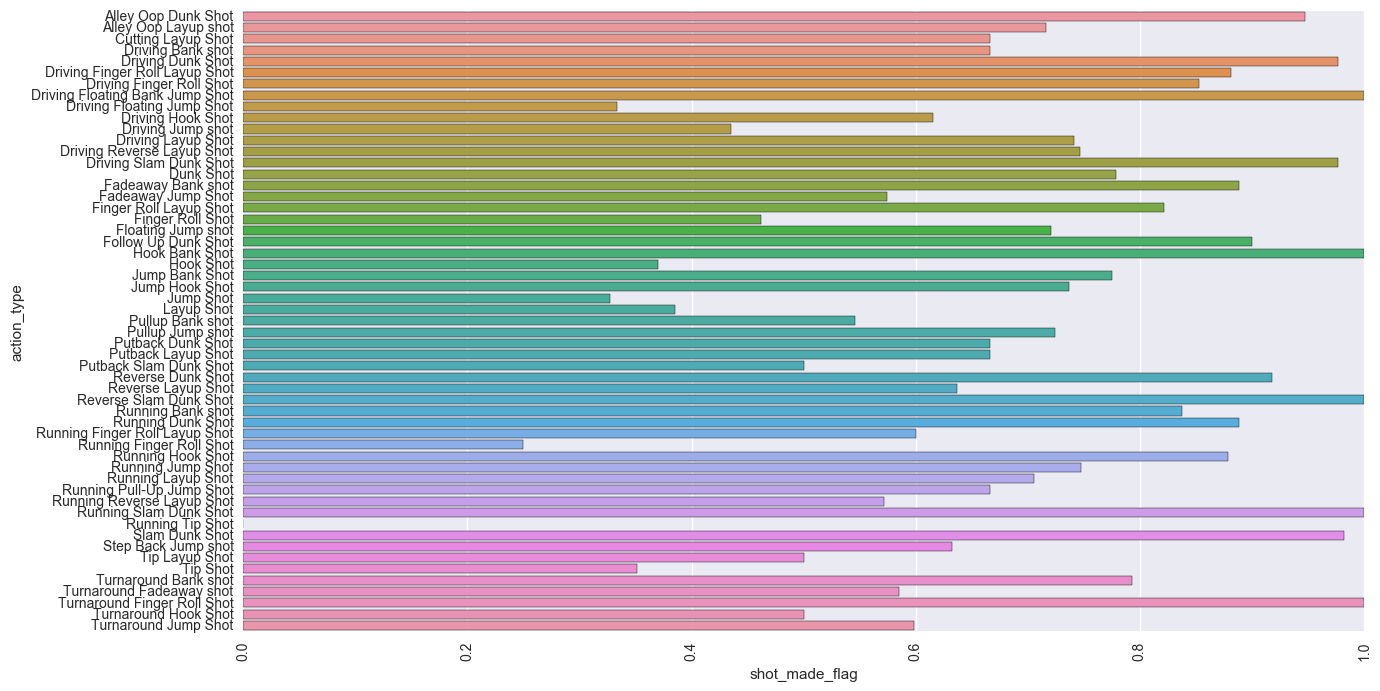

In [8]:
percent5=df.groupby(['action_type'],as_index=False).shot_made_flag.mean()
g=sns.factorplot(y="action_type",x="shot_made_flag",kind="bar",data=percent5,size=7,aspect=2)
plt.xticks(rotation=90)

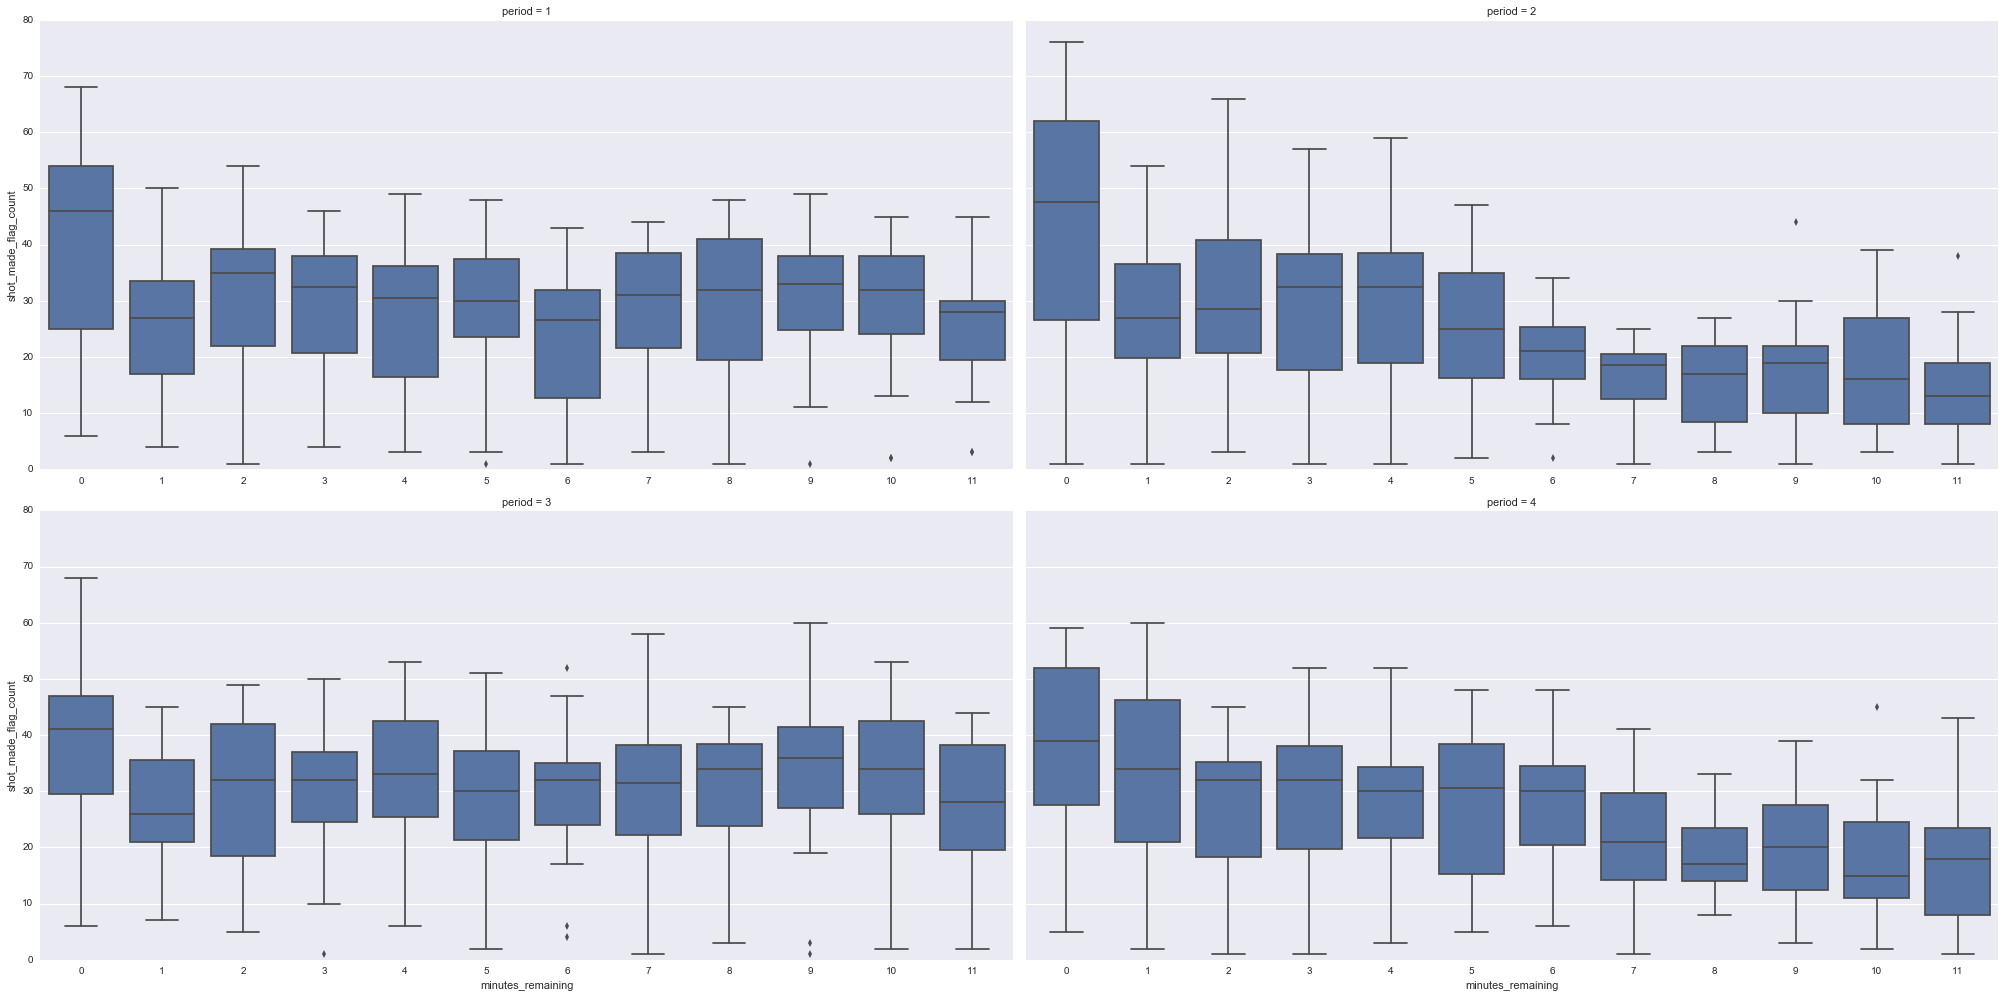

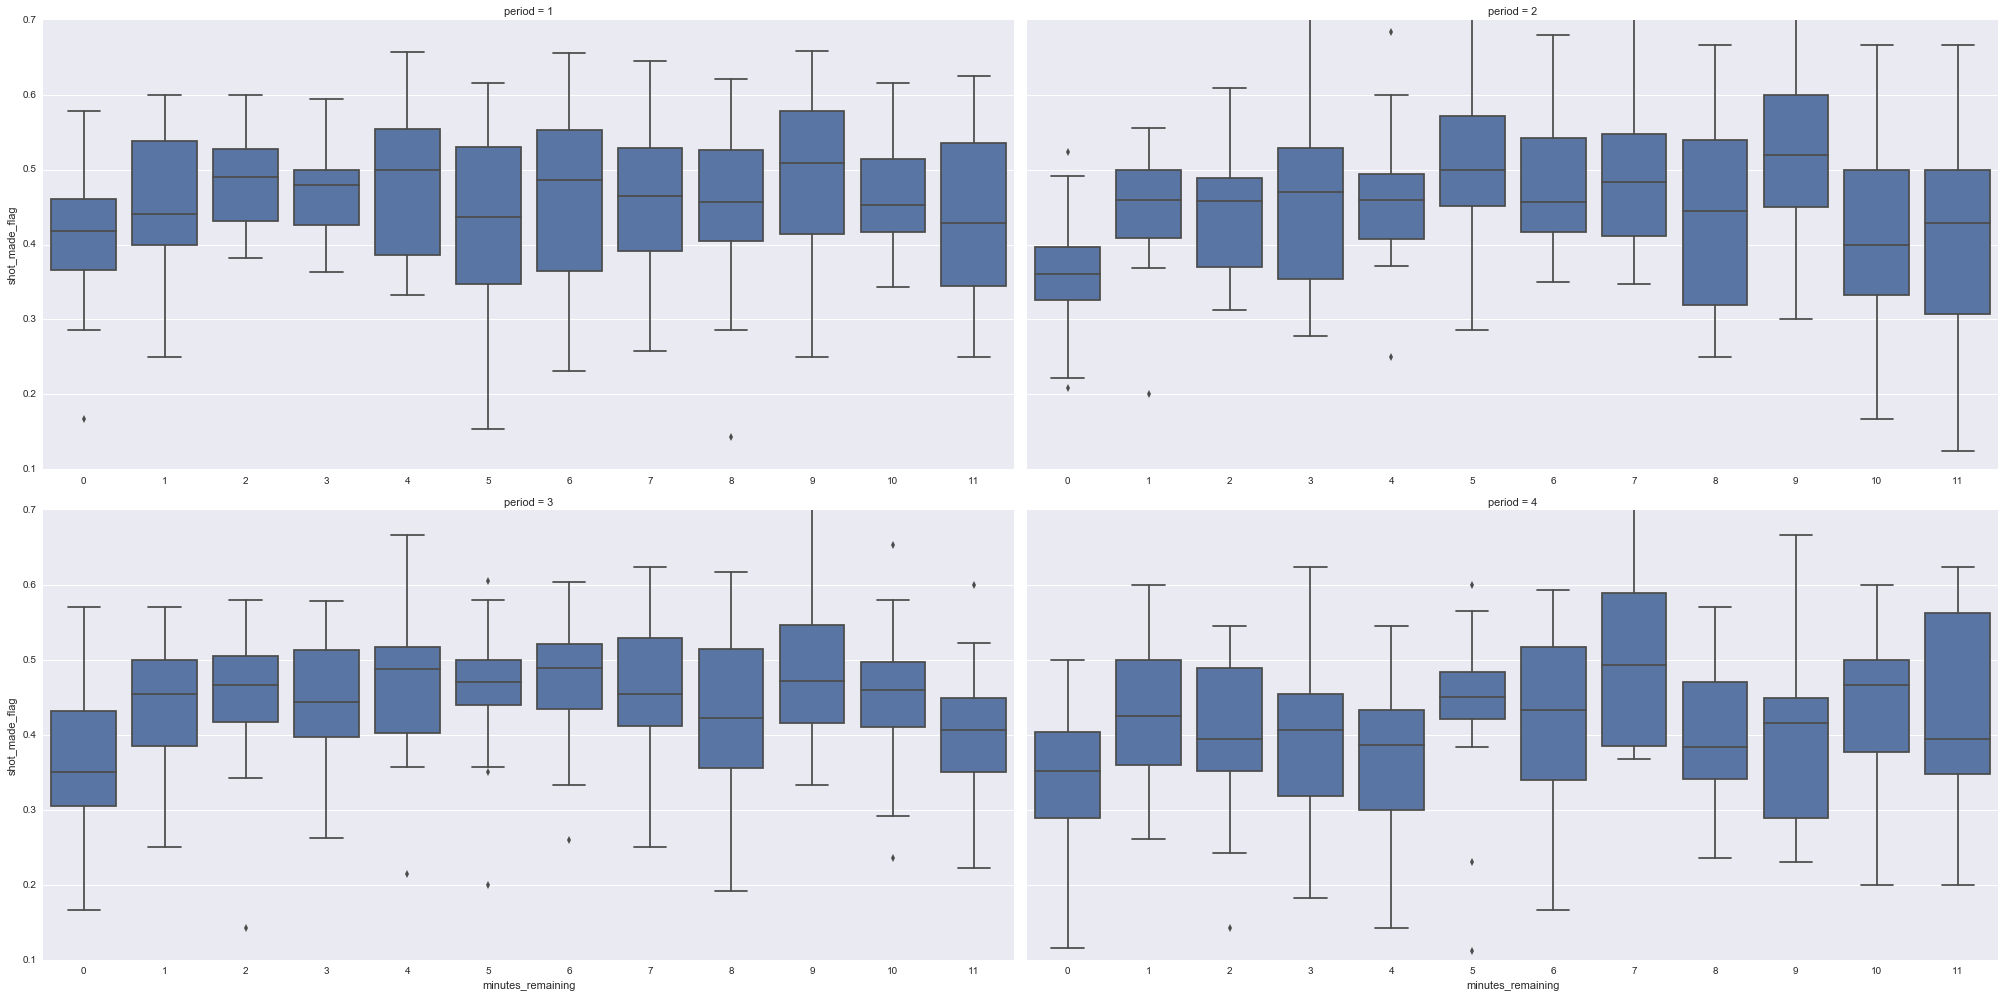

In [92]:
percent6=df.groupby(['minutes_remaining','period','season'],as_index=False)['shot_made_flag'].count()
percent6_reg=percent6[percent6.period<5]
percent6_reg.columns.values[3] = 'shot_made_flag_count'
percent7=df.groupby(['minutes_remaining','period','season'],as_index=False)['shot_made_flag'].mean()
percent7_reg=percent7[percent7.period<5][['shot_made_flag']]
percent8_reg=pd.concat([percent6_reg,percent7_reg],axis=1)
percent8_reg.head()
g = sns.FacetGrid(percent8_reg, col='period',sharex=False,size=7,aspect=2,col_wrap=2)
g=g.map(sns.boxplot, "minutes_remaining", "shot_made_flag_count")
g = sns.FacetGrid(percent8_reg, col='period',ylim=([0.10,0.7]),sharex=False,size=7,aspect=2,col_wrap=2)
g=g.map(sns.boxplot, "minutes_remaining", "shot_made_flag")

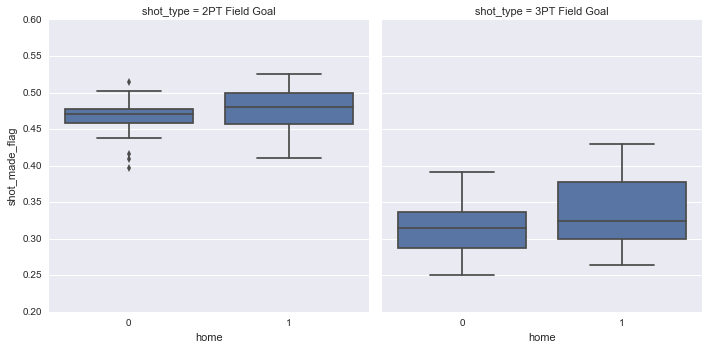

In [131]:
percent=df.groupby(['home','shot_type','season'],as_index=False)['shot_made_flag'].mean()
#g=sns.stripplot(x='home', y='shot_made_flag', col='shot_type',hue="season",data=percent,jitter=True, palette="Blues_d")
g = sns.FacetGrid(percent, col='shot_type',ylim=([0.2,0.6]),sharex=False,size=5,aspect=1)
g=g.map(sns.boxplot, "home", "shot_made_flag")

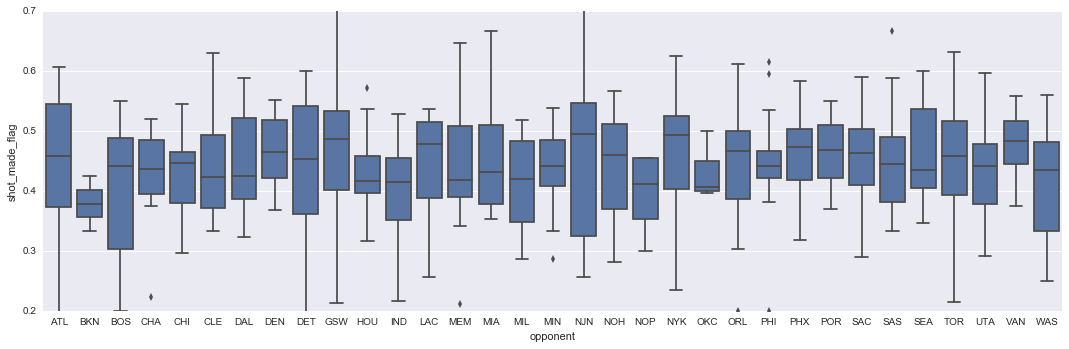

In [134]:
percent=df.groupby(['opponent','season'],as_index=False)['shot_made_flag'].mean()
g = sns.FacetGrid(percent,ylim=([0.2,0.7]),sharex=False,size=5,aspect=3)
g=g.map(sns.boxplot, "opponent", "shot_made_flag")

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 8 Text xticklabel objects>)

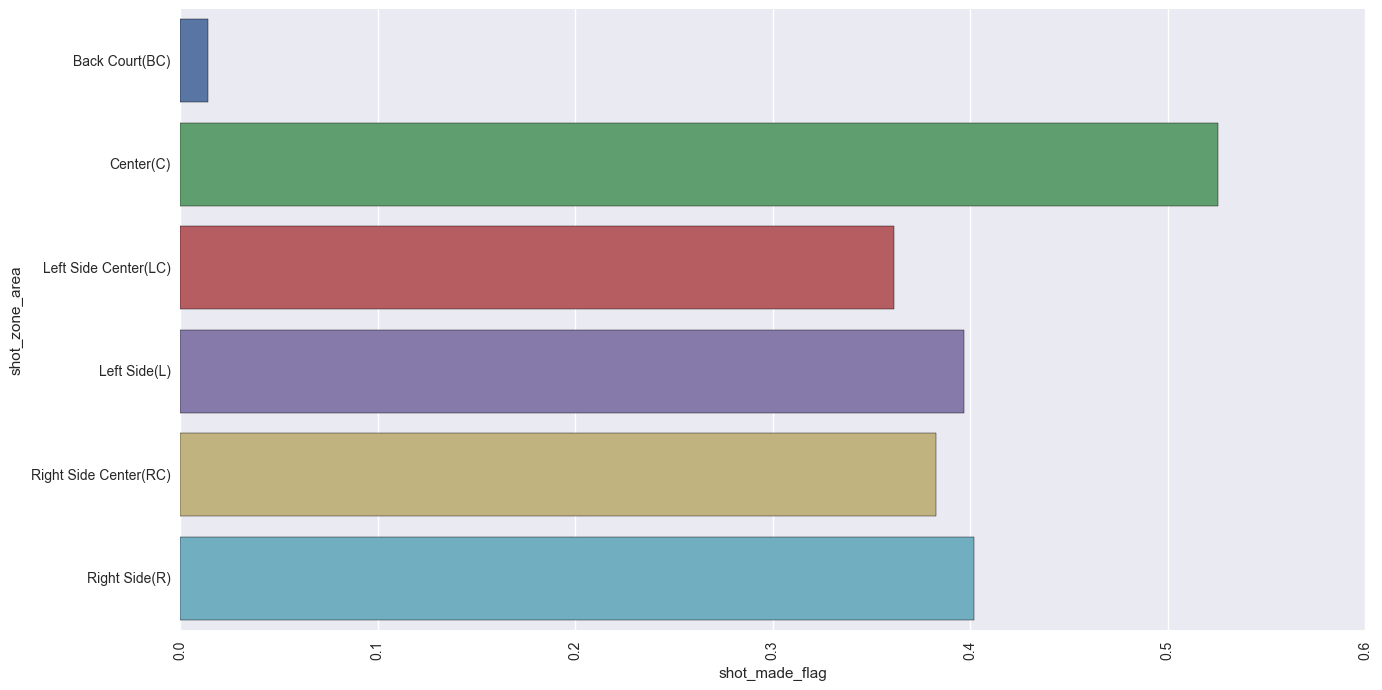

In [12]:
percent5=df.groupby(['shot_zone_area'],as_index=False).shot_made_flag.mean()
g=sns.factorplot(y="shot_zone_area",x="shot_made_flag",kind="bar",data=percent5,size=7,aspect=2)
plt.xticks(rotation=90)

In [30]:
df['distance_10ft'].unique()

array([ 15.7       ,  16.86001186,  22.28654302, ...,  13.99892853,
        67.910603  ,  21.33354167])

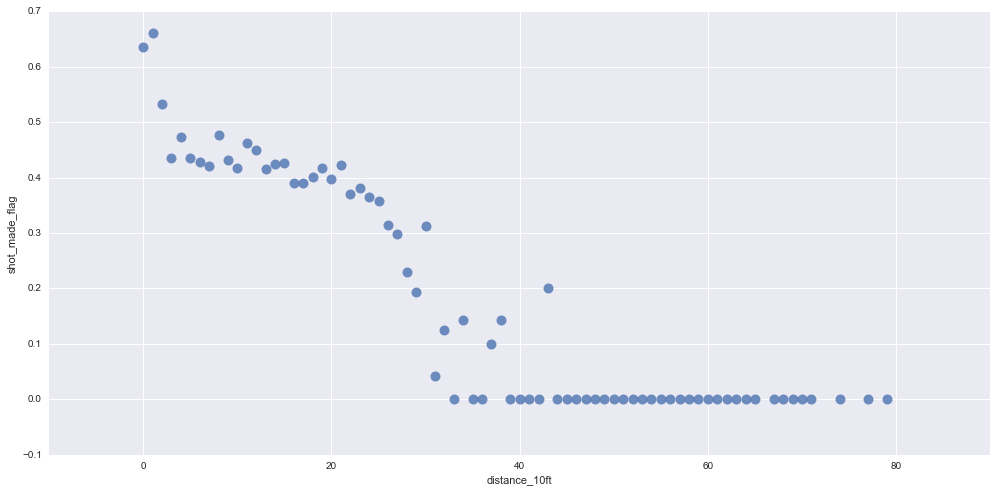

In [137]:
df['distance_10ft']=((df['loc_x']**2+df['loc_y']**2)**0.5)
df['distance_10ft'] = df['distance_10ft'].apply(lambda x: x/10).astype(int)
percent5=df.groupby(['distance_10ft'],as_index=False).shot_made_flag.mean()
sns.lmplot('distance_10ft', 'shot_made_flag', 
           data=percent5, 
           fit_reg=False, 
           size=7,aspect=2,
           scatter_kws={"marker": "D", 
                        "s": 100})

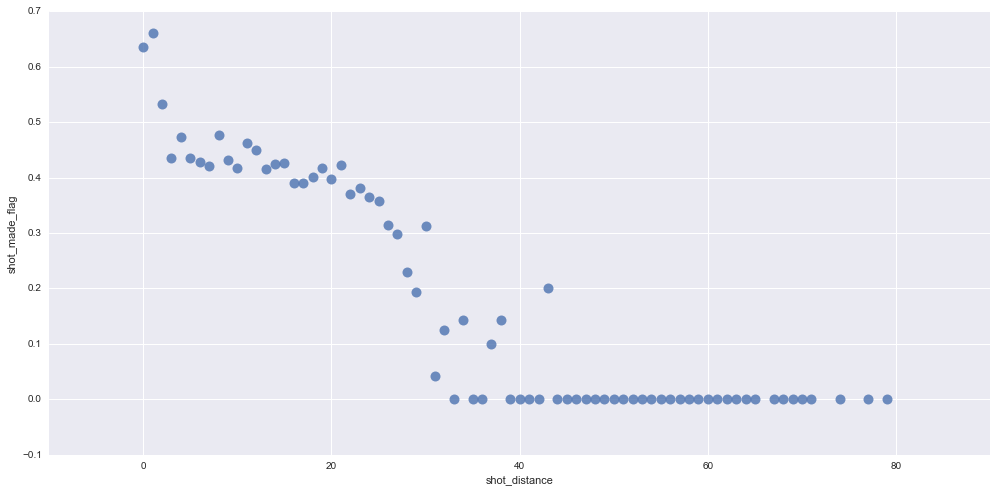

In [138]:
percent5=df.groupby(['shot_distance'],as_index=False).shot_made_flag.mean()
sns.lmplot('shot_distance', 'shot_made_flag', 
           data=percent5, 
           fit_reg=False, 
           size=7,aspect=2,
           scatter_kws={"marker": "D", 
                        "s": 100})

In [42]:
percent5.head()

,distance_10ft,shot_made_flag
0,0,0.634766
1,1,0.660920
2,2,0.532091
3,3,0.435737
4,4,0.473186


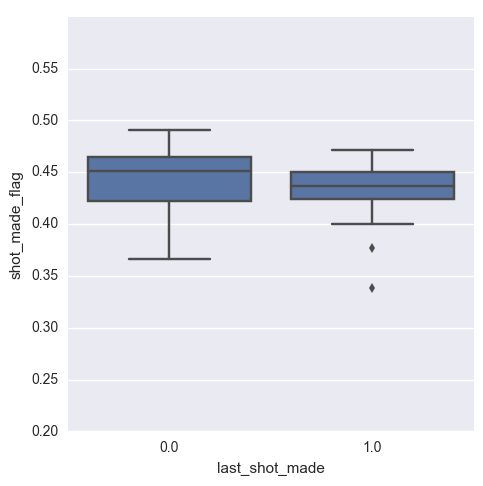

In [52]:
df['last_shot_made'] = df.shot_made_flag.shift(1)
percent=df.groupby(['last_shot_made',ㄏ],as_index=False).shot_made_flag.mean()
g = sns.FacetGrid(percent,ylim=([0.2,0.6]),sharex=False,size=5,aspect=1)
g=g.map(sns.boxplot, "last_shot_made", "shot_made_flag")

In [135]:
df.combined_shot_type.unique()

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'], dtype=object)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

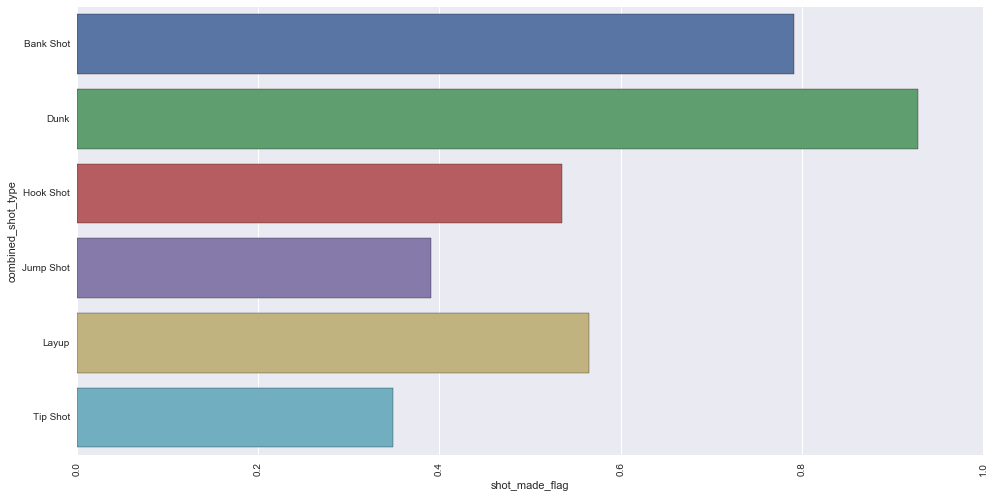

In [136]:
percent=df.groupby(['combined_shot_type'],as_index=False).shot_made_flag.mean()
g=sns.factorplot(y="combined_shot_type",x="shot_made_flag",kind="bar",data=percent,size=7,aspect=2)
plt.xticks(rotation=90)

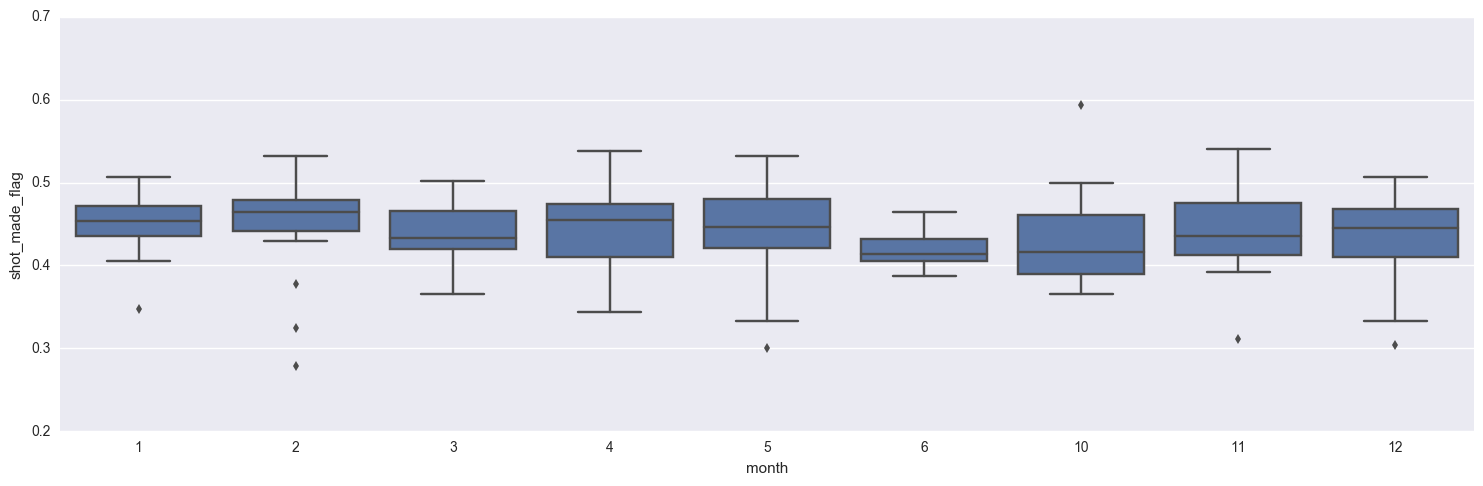

In [19]:
percent=df.groupby(['month','season'],as_index=False)['shot_made_flag'].mean()
g = sns.FacetGrid(percent,ylim=([0.2,0.7]),sharex=False,size=5,aspect=3)
g=g.map(sns.boxplot, "month", "shot_made_flag")

In [4]:
df.seconds_remaining.unique()

array([22, 45, 52, 19, 32, 12, 36, 56,  0,  9, 44, 16, 48, 50, 29,  8,  4,
       57, 47, 11, 30, 20, 13, 59, 21, 55, 38,  6, 33, 26, 40,  5,  2, 37,
        1, 17, 53, 10, 24, 46, 41, 54, 25, 15, 39, 14, 23, 18, 34, 51, 28,
        3, 43,  7, 42, 27, 35, 31, 58, 49], dtype=int64)